<a href="https://colab.research.google.com/github/dxmai/CS116.M12.KHCL/blob/main/CS116_BT1%2B2_Th%E1%BB%91ng_k%C3%AA_d%C3%A2n_s%E1%BB%91_Ranh_gi%E1%BB%9Bi_b%E1%BA%A3n_%C4%91%E1%BB%93.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Thông tin sinh viên

Họ và tên: Đặng Xuân Mai

MSSV: 19521820

Có bổ sung câu 2

#Cài đặt geopandas

In [ ]:
!pip install git+git://github.com/geopandas/geopandas.git

  Cloning git://github.com/geopandas/geopandas.git to /tmp/pip-req-build-rws7zv3_
  Running command git clone -q git://github.com/geopandas/geopandas.git /tmp/pip-req-build-rws7zv3_
     |████████████████████████████████| 15.4 MB 38 kB/s 
     |████████████████████████████████| 6.3 MB 48.5 MB/s 
  Created wheel for geopandas: filename=geopandas-0.9.0+101.g64c5813-py2.py3-none-any.whl size=1023399 sha256=15835aadbbd831406ab744161f675b20b0c7e681e0519aa17cf926be7b9258dd
  Stored in directory: /tmp/pip-ephem-wheel-cache-u29q6d4c/wheels/cf/3e/0b/6475054094c2b1ea054158ac1fdcf749fb92f5b512377e4cf8
Successfully built geopandas


Ref: https://ecyy.medium.com/mapping-by-geopandas-in-colab-fe4b63b9ac00

#Clone repo

In [ ]:
! git clone https://github.com/CityScope/CSL_HCMC

Cloning into 'CSL_HCMC'...
remote: Enumerating objects: 1930, done.
remote: Counting objects: 100% (590/590), done.
remote: Compressing objects: 100% (314/314), done.
remote: Total 1930 (delta 309), reused 500 (delta 270), pack-reused 1340
Receiving objects: 100% (1930/1930), 178.53 MiB | 20.77 MiB/s, done.
Resolving deltas: 100% (986/986), done.
Checking out files: 100% (542/542), done.


Ref: https://lalorosas.com/blog/github-colab-drive

#Đọc dữ liệu

In [ ]:
import geopandas
data = geopandas.read_file("CSL_HCMC/Data/GIS/Population/population_HCMC/population_shapefile/Population_Ward_Level.shp")  

In [ ]:
data

,Com_Name,Dist_Name,Com_ID,Dist_ID,Level,Pop_2009,Pop_2019,Den_2009,Den_2019,Shape_Leng,Shape_Area,geometry
0,Tan Dinh,District 1,26734,760,Ward,26571.0,23258.0,41942.70,36713.10,3679.098196,6.334981e+05,"POLYGON ((684350.511 1193546.266, 684363.810 1..."
1,Ben Nghe,District 1,26740,760,Ward,13580.0,10633.0,5480.09,4290.86,6978.149149,2.478041e+06,"POLYGON ((686564.657 1193462.473, 686588.924 1..."
2,Cau Ong Lanh,District 1,26752,760,Ward,12917.0,10737.0,56878.90,47279.50,2260.705105,2.270938e+05,"POLYGON ((685922.373 1190479.807, 685914.160 1..."
3,Nguyen Thai Binh,District 1,26746,760,Ward,13197.0,9716.0,26798.80,19730.00,3320.174618,4.924426e+05,"POLYGON ((685966.333 1190513.667, 685944.353 1..."
4,Co Giang,District 1,26755,760,Ward,18967.0,11517.0,53327.60,32381.20,2525.453814,3.556650e+05,"POLYGON ((685514.573 1190211.431, 685547.521 1..."
...,...,...,...,...,...,...,...,...,...,...,...,...
317,Tan Hung Thuan,District 12,26787,761,Ward,28892.0,33467.0,16053.40,18595.50,6271.308704,1.799659e+06,"POLYGON ((677816.513 1197206.772, 677796.932 1..."
318,Ward 17,Go Vap,26875,764,Ward,44226.0,54728.0,38061.20,47099.30,6385.950275,1.161947e+06,"POLYGON ((683516.949 1200006.226, 683509.721 1..."
319,Ward 8,Go Vap,26898,764,Ward,26545.0,32778.0,22751.50,28093.70,5409.821020,1.166701e+06,"POLYGON ((680928.492 1199066.285, 680984.889 1..."
320,Ward 9,Go Vap,26897,764,Ward,26785.0,34596.0,31843.10,41129.20,3950.799798,8.411288e+05,"POLYGON ((681120.443 1199640.183, 681120.846 1..."


Ref: https://geopandas.org/docs/reference/api/geopandas.read_file.html

#Tính toán

###Phường có diện tích lớn nhất

In [ ]:
largest_area_data = data[data['Shape_Area'] == data['Shape_Area'].max()]
com_name = largest_area_data['Com_Name']
dist_name = largest_area_data['Dist_Name']
print("Phường có diện tích lớn nhất là", com_name, "quận", dist_name)

Phường có diện tích lớn nhất là 204    Ly Nhon
Name: Com_Name, dtype: object quận 204    Can Gio
Name: Dist_Name, dtype: object


###Phường có diện tích nhỏ nhất

In [ ]:
smallest_area_data = data[data['Shape_Area'] == data['Shape_Area'].min()]
com_name = smallest_area_data['Com_Name']
dist_name = smallest_area_data['Dist_Name']
print("Phường có diện tích nhỏ nhất là", com_name, "quận", dist_name)

Phường có diện tích nhỏ nhất là 71    Ward 3
Name: Com_Name, dtype: object quận 71    District 10
Name: Dist_Name, dtype: object


Ref: https://stackoverflow.com/questions/15741759/find-maximum-value-of-a-column-and-return-the-corresponding-row-values-using-pan

###Phường có dân số cao nhất

In [ ]:
highest_pop_data = data[data['Pop_2019'] == data['Pop_2019'].max()]
com_name = highest_pop_data['Com_Name']
dist_name = highest_pop_data['Dist_Name']
print("Phường có dân số cao nhất là", com_name, "quận", dist_name)

Phường có dân số cao nhất là 168    Vinh Loc A
Name: Com_Name, dtype: object quận 168    Binh Chanh
Name: Dist_Name, dtype: object


###Phường có dân số thấp nhất

In [ ]:
lowest_pop_data = data[data['Pop_2019'] == data['Pop_2019'].min()]
com_name = lowest_pop_data['Com_Name']
dist_name = lowest_pop_data['Dist_Name']
print("Phường có dân số thấp nhất là", com_name, "quận", dist_name)

Phường có dân số thấp nhất là 218    An Khanh
Name: Com_Name, dtype: object quận 218    District 2
Name: Dist_Name, dtype: object


###Phường có tốc độ tăng trưởng nhanh nhất

In [ ]:
def Calculate_Growth(row):
  return row['Pop_2019'] / row['Pop_2009']

In [ ]:
data['Growth'] = data.apply(Calculate_Growth, axis = 1)

Ref: https://jonathansoma.com/lede/foundations/classes/pandas%20columns%20and%20functions/apply-a-function-to-every-row-in-a-pandas-dataframe/

In [ ]:
data

,Com_Name,Dist_Name,Com_ID,Dist_ID,Level,Pop_2009,Pop_2019,Den_2009,Den_2019,Shape_Leng,Shape_Area,geometry,Growth
0,Tan Dinh,District 1,26734,760,Ward,26571.0,23258.0,41942.70,36713.10,3679.098196,6.334981e+05,"POLYGON ((684350.511 1193546.266, 684363.810 1...",0.875315
1,Ben Nghe,District 1,26740,760,Ward,13580.0,10633.0,5480.09,4290.86,6978.149149,2.478041e+06,"POLYGON ((686564.657 1193462.473, 686588.924 1...",0.782990
2,Cau Ong Lanh,District 1,26752,760,Ward,12917.0,10737.0,56878.90,47279.50,2260.705105,2.270938e+05,"POLYGON ((685922.373 1190479.807, 685914.160 1...",0.831230
3,Nguyen Thai Binh,District 1,26746,760,Ward,13197.0,9716.0,26798.80,19730.00,3320.174618,4.924426e+05,"POLYGON ((685966.333 1190513.667, 685944.353 1...",0.736228
4,Co Giang,District 1,26755,760,Ward,18967.0,11517.0,53327.60,32381.20,2525.453814,3.556650e+05,"POLYGON ((685514.573 1190211.431, 685547.521 1...",0.607213
...,...,...,...,...,...,...,...,...,...,...,...,...,...
317,Tan Hung Thuan,District 12,26787,761,Ward,28892.0,33467.0,16053.40,18595.50,6271.308704,1.799659e+06,"POLYGON ((677816.513 1197206.772, 677796.932 1...",1.158348
318,Ward 17,Go Vap,26875,764,Ward,44226.0,54728.0,38061.20,47099.30,6385.950275,1.161947e+06,"POLYGON ((683516.949 1200006.226, 683509.721 1...",1.237462
319,Ward 8,Go Vap,26898,764,Ward,26545.0,32778.0,22751.50,28093.70,5409.821020,1.166701e+06,"POLYGON ((680928.492 1199066.285, 680984.889 1...",1.234809
320,Ward 9,Go Vap,26897,764,Ward,26785.0,34596.0,31843.10,41129.20,3950.799798,8.411288e+05,"POLYGON ((681120.443 1199640.183, 681120.846 1...",1.291618


In [ ]:
highets_growth = data[data['Growth'] == data['Growth'].max()]
com_name = highets_growth['Com_Name']
dist_name = highets_growth['Dist_Name']
print("Phường có tốc độ tăng trưởng nhanh nhất là", com_name, "quận", dist_name)

Phường có tốc độ tăng trưởng nhanh nhất là 211    Phu Huu
Name: Com_Name, dtype: object quận 211    District 9
Name: Dist_Name, dtype: object


###Phường có tốc độ tăng trưởng chậm nhất

In [ ]:
lowest_growth = data[data['Growth'] == data['Growth'].min()]
com_name = lowest_growth['Com_Name']
dist_name = lowest_growth['Dist_Name']
print("Phường có tốc độ tăng trưởng chậm nhất là", com_name, "quận", dist_name)

Phường có tốc độ tăng trưởng chậm nhất là 218    An Khanh
Name: Com_Name, dtype: object quận 218    District 2
Name: Dist_Name, dtype: object


###Phường có biến động dân số nhanh nhất

In [ ]:
def Calculate_Change(row):
  return row['Pop_2019'] - row['Pop_2009']

In [ ]:
data['Change'] = data.apply(Calculate_Change, axis = 1)

In [ ]:
data

,Com_Name,Dist_Name,Com_ID,Dist_ID,Level,Pop_2009,Pop_2019,Den_2009,Den_2019,Shape_Leng,Shape_Area,geometry,Growth,Change
0,Tan Dinh,District 1,26734,760,Ward,26571.0,23258.0,41942.70,36713.10,3679.098196,6.334981e+05,"POLYGON ((684350.511 1193546.266, 684363.810 1...",0.875315,-3313.0
1,Ben Nghe,District 1,26740,760,Ward,13580.0,10633.0,5480.09,4290.86,6978.149149,2.478041e+06,"POLYGON ((686564.657 1193462.473, 686588.924 1...",0.782990,-2947.0
2,Cau Ong Lanh,District 1,26752,760,Ward,12917.0,10737.0,56878.90,47279.50,2260.705105,2.270938e+05,"POLYGON ((685922.373 1190479.807, 685914.160 1...",0.831230,-2180.0
3,Nguyen Thai Binh,District 1,26746,760,Ward,13197.0,9716.0,26798.80,19730.00,3320.174618,4.924426e+05,"POLYGON ((685966.333 1190513.667, 685944.353 1...",0.736228,-3481.0
4,Co Giang,District 1,26755,760,Ward,18967.0,11517.0,53327.60,32381.20,2525.453814,3.556650e+05,"POLYGON ((685514.573 1190211.431, 685547.521 1...",0.607213,-7450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
317,Tan Hung Thuan,District 12,26787,761,Ward,28892.0,33467.0,16053.40,18595.50,6271.308704,1.799659e+06,"POLYGON ((677816.513 1197206.772, 677796.932 1...",1.158348,4575.0
318,Ward 17,Go Vap,26875,764,Ward,44226.0,54728.0,38061.20,47099.30,6385.950275,1.161947e+06,"POLYGON ((683516.949 1200006.226, 683509.721 1...",1.237462,10502.0
319,Ward 8,Go Vap,26898,764,Ward,26545.0,32778.0,22751.50,28093.70,5409.821020,1.166701e+06,"POLYGON ((680928.492 1199066.285, 680984.889 1...",1.234809,6233.0
320,Ward 9,Go Vap,26897,764,Ward,26785.0,34596.0,31843.10,41129.20,3950.799798,8.411288e+05,"POLYGON ((681120.443 1199640.183, 681120.846 1...",1.291618,7811.0


In [ ]:
fastest_change = data[data['Change'] == data['Change'].max()]
com_name = fastest_change['Com_Name']
dist_name = fastest_change['Dist_Name']
print("Phường có biến động dân số nhanh nhất là", com_name, "quận", dist_name)

Phường có biến động dân số nhanh nhất là 168    Vinh Loc A
Name: Com_Name, dtype: object quận 168    Binh Chanh
Name: Dist_Name, dtype: object


###Phường có biến động dân số chậm nhất

In [ ]:
slowest_change = data[data['Change'] == data['Change'].min()]
com_name = slowest_change['Com_Name']
dist_name = slowest_change['Dist_Name']
print("Phường có biến động dân số chậm nhất là", com_name, "quận", dist_name)

,Com_Name,Dist_Name,Com_ID,Dist_ID,Level,Pop_2009,Pop_2019,Den_2009,Den_2019,Shape_Leng,Shape_Area,geometry,Growth,Change
218,An Khanh,District 2,27106,769,Ward,15659.0,223.0,8830.98,125.762,6715.625464,1.773186e+06,"POLYGON ((688894.225 1192163.773, 688895.628 1...",0.014241,-15436.0


###Phường có mật độ dân số cao nhất

In [ ]:
def Calculate_Density(row):
  return row['Pop_2019'] / row['Shape_Area']

In [ ]:
data['Density'] = data.apply(Calculate_Density, axis = 1)

In [ ]:
data

,Com_Name,Dist_Name,Com_ID,Dist_ID,Level,Pop_2009,Pop_2019,Den_2009,Den_2019,Shape_Leng,Shape_Area,geometry,Growth,Change,Density
0,Tan Dinh,District 1,26734,760,Ward,26571.0,23258.0,41942.70,36713.10,3679.098196,6.334981e+05,"POLYGON ((684350.511 1193546.266, 684363.810 1...",0.875315,-3313.0,0.036714
1,Ben Nghe,District 1,26740,760,Ward,13580.0,10633.0,5480.09,4290.86,6978.149149,2.478041e+06,"POLYGON ((686564.657 1193462.473, 686588.924 1...",0.782990,-2947.0,0.004291
2,Cau Ong Lanh,District 1,26752,760,Ward,12917.0,10737.0,56878.90,47279.50,2260.705105,2.270938e+05,"POLYGON ((685922.373 1190479.807, 685914.160 1...",0.831230,-2180.0,0.047280
3,Nguyen Thai Binh,District 1,26746,760,Ward,13197.0,9716.0,26798.80,19730.00,3320.174618,4.924426e+05,"POLYGON ((685966.333 1190513.667, 685944.353 1...",0.736228,-3481.0,0.019730
4,Co Giang,District 1,26755,760,Ward,18967.0,11517.0,53327.60,32381.20,2525.453814,3.556650e+05,"POLYGON ((685514.573 1190211.431, 685547.521 1...",0.607213,-7450.0,0.032382
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
317,Tan Hung Thuan,District 12,26787,761,Ward,28892.0,33467.0,16053.40,18595.50,6271.308704,1.799659e+06,"POLYGON ((677816.513 1197206.772, 677796.932 1...",1.158348,4575.0,0.018596
318,Ward 17,Go Vap,26875,764,Ward,44226.0,54728.0,38061.20,47099.30,6385.950275,1.161947e+06,"POLYGON ((683516.949 1200006.226, 683509.721 1...",1.237462,10502.0,0.047100
319,Ward 8,Go Vap,26898,764,Ward,26545.0,32778.0,22751.50,28093.70,5409.821020,1.166701e+06,"POLYGON ((680928.492 1199066.285, 680984.889 1...",1.234809,6233.0,0.028095
320,Ward 9,Go Vap,26897,764,Ward,26785.0,34596.0,31843.10,41129.20,3950.799798,8.411288e+05,"POLYGON ((681120.443 1199640.183, 681120.846 1...",1.291618,7811.0,0.041130


In [ ]:
highets_density = data[data['Density'] == data['Density'].max()]
com_name = highets_density['Com_Name']
dist_name = highets_density['Dist_Name']
print("Phường có mật độ dân số cao nhất là", com_name, "quận", dist_name)

Phường có mật độ dân số cao nhất là 16    Ward 8
Name: Com_Name, dtype: object quận 16    District 4
Name: Dist_Name, dtype: object


###Phường có mật độ dân số thấp nhất

In [ ]:
lowest_density = data[data['Density'] == data['Density'].min()]
com_name = lowest_density['Com_Name']
dist_name = lowest_density['Dist_Name']
print("Phường có mật độ dân số thấp nhất là", com_name, "quận", dist_name)

Phường có mật độ dân số thấp nhất là 204    Ly Nhon
Name: Com_Name, dtype: object quận 204    Can Gio
Name: Dist_Name, dtype: object


#Bài 2

In [ ]:
import geopandas as gpd
import folium
import matplotlib.pyplot as plt

In [ ]:
data.crs

<Projected CRS: EPSG:32648>
Name: WGS 84 / UTM zone 48N
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Between 102°E and 108°E, northern hemisphere between equator and 84°N, onshore and offshore. Cambodia. China. Indonesia. Laos. Malaysia - West Malaysia. Mongolia. Russian Federation. Singapore. Thailand. Vietnam.
- bounds: (102.0, 0.0, 108.0, 84.0)
Coordinate Operation:
- name: UTM zone 48N
- method: Transverse Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

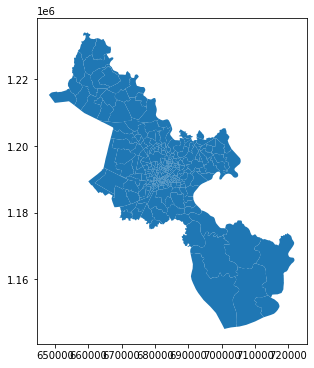

In [ ]:
data.plot(figsize=(6, 6))
plt.
plt.show()

In [ ]:
data.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [ ]:
data = data.to_crs(epsg=4326)
print(data.crs)
data.head()

epsg:4326


,Com_Name,Dist_Name,Com_ID,Dist_ID,Level,Pop_2009,Pop_2019,Den_2009,Den_2019,Shape_Leng,Shape_Area,geometry,Growth,Change,Density
0,Tan Dinh,District 1,26734,760,Ward,26571.0,23258.0,41942.70,36713.10,3679.098196,6.334981e+05,"POLYGON ((106.68612 10.79252, 106.68624 10.792...",0.875315,-3313.0,0.036714
1,Ben Nghe,District 1,26740,760,Ward,13580.0,10633.0,5480.09,4290.86,6978.149149,2.478041e+06,"POLYGON ((106.70636 10.79165, 106.70658 10.791...",0.782990,-2947.0,0.004291
2,Cau Ong Lanh,District 1,26752,760,Ward,12917.0,10737.0,56878.90,47279.50,2260.705105,2.270938e+05,"POLYGON ((106.70033 10.76472, 106.70026 10.764...",0.831230,-2180.0,0.047280
3,Nguyen Thai Binh,District 1,26746,760,Ward,13197.0,9716.0,26798.80,19730.00,3320.174618,4.924426e+05,"POLYGON ((106.70074 10.76502, 106.70054 10.764...",0.736228,-3481.0,0.019730
4,Co Giang,District 1,26755,760,Ward,18967.0,11517.0,53327.60,32381.20,2525.453814,3.556650e+05,"POLYGON ((106.69659 10.76231, 106.69689 10.762...",0.607213,-7450.0,0.032382


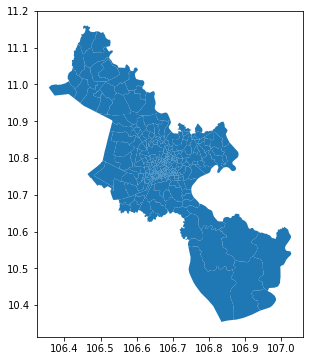

In [ ]:
data.plot(figsize=(6, 6))
plt.show()

In [ ]:
m = folium.Map(location=[11.2, 107.0], zoom_start=10, tiles='CartoDB positron')
m

In [ ]:
for _, r in data.iterrows():
    sim_geo = gpd.GeoSeries(r['geometry']).simplify(tolerance=0.001)
    geo_j = sim_geo.to_json()
    geo_j = folium.GeoJson(data=geo_j,
                           style_function=lambda x: {'fillColor': 'orange'})
    folium.Popup(r['Com_Name']).add_to(geo_j)
    geo_j.add_to(m)
m

In [ ]:
data = data.to_crs(epsg=2263)
data['centroid'] = data.centroid

In [ ]:
data = data.to_crs(epsg=4326)
data['centroid'] = data['centroid'].to_crs(epsg=4326)

data.head()

,Com_Name,Dist_Name,Com_ID,Dist_ID,Level,Pop_2009,Pop_2019,Den_2009,Den_2019,Shape_Leng,Shape_Area,geometry,Growth,Change,Density,centroid
0,Tan Dinh,District 1,26734,760,Ward,26571.0,23258.0,41942.70,36713.10,3679.098196,6.334981e+05,"POLYGON ((106.68612 10.79252, 106.68624 10.792...",0.875315,-3313.0,0.036714,POINT (106.69063 10.79266)
1,Ben Nghe,District 1,26740,760,Ward,13580.0,10633.0,5480.09,4290.86,6978.149149,2.478041e+06,"POLYGON ((106.70636 10.79165, 106.70658 10.791...",0.782990,-2947.0,0.004291,POINT (106.70463 10.78059)
2,Cau Ong Lanh,District 1,26752,760,Ward,12917.0,10737.0,56878.90,47279.50,2260.705105,2.270938e+05,"POLYGON ((106.70033 10.76472, 106.70026 10.764...",0.831230,-2180.0,0.047280,POINT (106.69677 10.76539)
3,Nguyen Thai Binh,District 1,26746,760,Ward,13197.0,9716.0,26798.80,19730.00,3320.174618,4.924426e+05,"POLYGON ((106.70074 10.76502, 106.70054 10.764...",0.736228,-3481.0,0.019730,POINT (106.70122 10.76867)
4,Co Giang,District 1,26755,760,Ward,18967.0,11517.0,53327.60,32381.20,2525.453814,3.556650e+05,"POLYGON ((106.69659 10.76231, 106.69689 10.762...",0.607213,-7450.0,0.032382,POINT (106.69357 10.76216)


In [ ]:
for _, r in data.iterrows():
    lat = r['centroid'].y
    lon = r['centroid'].x
    folium.Marker(location=[lat, lon],
                  popup='length: {} <br> area: {}'.format(r['Shape_Leng'], r['Shape_Area'])).add_to(m)

m